In [ ]:
დაკავშირებულია ბაზასთან, რომელიც ეხება Students Social Media Addiction.

In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("sadd.csv")
conn = sqlite3.connect("sadd.db")
c = conn.cursor()
print(f"დაკავშირებულია ბაზასთან sadd.db") 

დაკავშირებულია ბაზასთან sadd.db


In [ ]:
სქესისა და სტატუსის შეყვანის შემდეგ აჩვენებს, შესაბამისი სტუდენტების სიას,რომლებსაც აქვთ 3_ზე მეტი Addiction score

In [2]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("sadd.csv")
conn = sqlite3.connect("sadd.db")
c = conn.cursor()

gend = input("Enter Gender: ")
status = input("Enter Status: ")
c.execute("SELECT * FROM your_table_name WHERE Gender = ? AND Relationship_Status = ? AND Addicted_score >= 3", (gend, status))
for each in c.fetchall():
    print(each)


Enter Gender:  Male
Enter Status:  Single


(2, 22, 'Male', 'Graduate', 'India', 2.1, 'Twitter', 'No', 7.5, 8, 'Single', 0, 3)
(4, 18, 'Male', 'High School', 'UK', 3.0, 'YouTube', 'No', 7.0, 7, 'Single', 1, 4)
(9, 18, 'Male', 'High School', 'Japan', 4.0, 'TikTok', 'No', 6.5, 7, 'Single', 1, 5)
(13, 22, 'Male', 'Graduate', 'Italy', 2.8, 'LinkedIn', 'No', 7.2, 8, 'Single', 1, 4)
(17, 24, 'Male', 'Graduate', 'Sweden', 2.0, 'LinkedIn', 'No', 7.8, 8, 'Single', 0, 3)
(19, 21, 'Male', 'Undergraduate', 'Denmark', 3.5, 'Facebook', 'No', 6.7, 7, 'Single', 1, 5)
(21, 18, 'Male', 'High School', 'Belgium', 5.3, 'TikTok', 'Yes', 5.5, 5, 'Single', 4, 8)
(27, 21, 'Male', 'Undergraduate', 'New Zealand', 3.8, 'YouTube', 'No', 6.6, 7, 'Single', 1, 5)
(29, 24, 'Male', 'Graduate', 'Malaysia', 2.2, 'LinkedIn', 'No', 7.4, 8, 'Single', 0, 3)
(31, 21, 'Male', 'Undergraduate', 'Vietnam', 3.6, 'Facebook', 'No', 6.7, 7, 'Single', 1, 5)
(37, 22, 'Male', 'Graduate', 'Israel', 3.1, 'Facebook', 'No', 6.8, 7, 'Single', 1, 5)
(43, 21, 'Male', 'Undergraduate', 'K

In [ ]:
ამატებს ახალ სტუდენტს თავისი მონაცემებით

In [3]:
c.execute("SELECT MAX(Student_ID) FROM your_table_name")
result = c.fetchone()
next_id = (result[0] or 0) + 1


age = int(input("Enter age: "))
gender = input("Enter gender: ")
academic_level = input("Enter Academic level: ")
country = input("Enter country: ")
avg_daily_usage_hours = float(input("Enter Average daily usage of SocMedia in hours: "))
affect = input("Does it affect Academic performance? (Yes/No): ")
platform = input("Enter most used platform: ")
sleep = float(input("Enter sleep hours (a Day): "))
mhealth = float(input("Enter Mental health score ?/10: "))
relationship = input("Enter relationship status: ")
conflict = int(input("Conflict over social media ?/10: "))
addiction = float(input("Enter addiction score ?/10: "))


try:
    c.execute("""
        INSERT INTO your_table_name (
            Student_ID, Age, Gender, Academic_level, Country,
            Avg_Daily_Usage_Hours, Most_Used_Platform, Affects_Academic_Performance, Sleep_Hours_Per_Night, 
            Mental_Health_Score, Relationship_Status, Conflicts_Over_Social_Media, Addicted_Score
        ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, (
        next_id, age, gender, academic_level, country,
        avg_daily_usage_hours, platform, affect, sleep,
        mhealth, relationship, conflict, addiction
    ))
    conn.commit()
    print(f"Student added successfully with ID: {next_id}")
except Exception as e:
    print("Error:", e)

Enter age:  20
Enter gender:  Male
Enter Academic level:  Graduate
Enter country:  USA
Enter Average daily usage of SocMedia in hours:  7
Does it affect Academic performance? (Yes/No):  No
Enter most used platform:  Instagram
Enter sleep hours (a Day):  7
Enter Mental health score ?/10:  5
Enter relationship status:  Single
Conflict over social media ?/10:  4
Enter addiction score ?/10:  5


Student added successfully with ID: 707


In [ ]:
მომხმარებელს საშუალებას აძლევს წაშალოს სტუდენტი

In [5]:
student_id = input("Enter student ID to delete: ")

c.execute("DELETE FROM your_table_name WHERE Student_ID = ?", (student_id))
conn.commit()

print("Student deleted.")

Enter student ID to delete:  3


Student deleted.


In [ ]:
ეს დიაგრამა აჩვენებს ადამიანების რაოდენობას და მათ მენტალური ჯანმრთელობის შეფასებებს

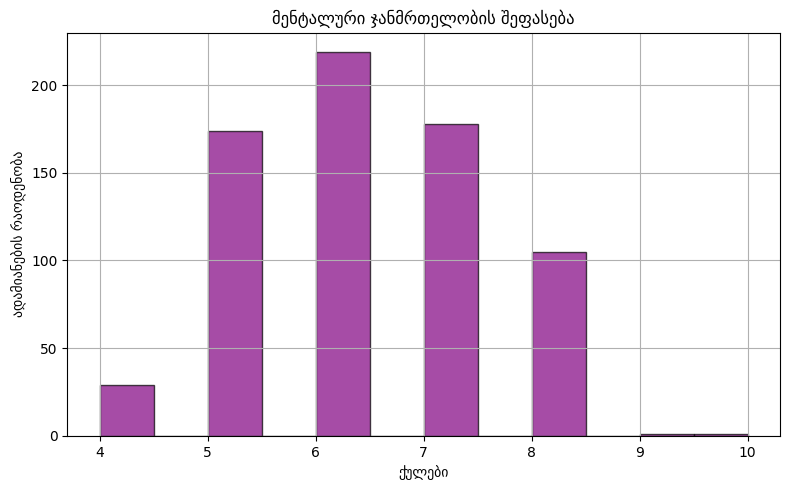

In [4]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("sadd.csv")
conn = sqlite3.connect("sadd.db")
c = conn.cursor()
c.execute("SELECT Mental_Health_Score FROM your_table_name")
mental_health_score = [row[0] for row in c.fetchall() if row[0] is not None]

plt.figure(figsize=(8, 5))
plt.hist(mental_health_score, bins=12, color='purple', edgecolor='black', alpha=0.7)
plt.title("მენტალური ჯანმრთელობის შეფასება")
plt.xlabel("ქულები")
plt.ylabel("ადამიანების რაოდენობა")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
ეს დიაგრამა აჩვენებს სტუდენტების სქესს და მათ Relationship Status

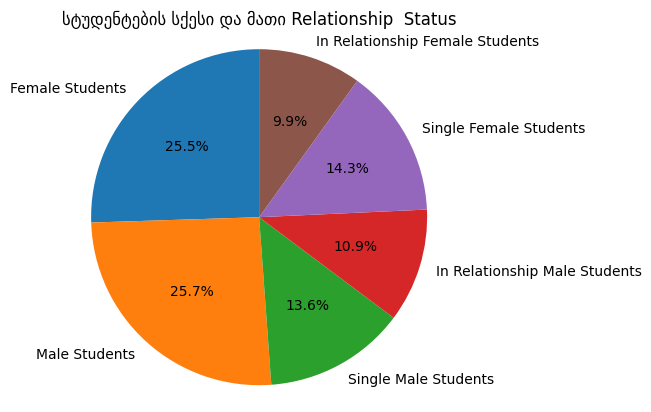

In [6]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("sadd.csv")
conn = sqlite3.connect("sadd.db")
c = conn.cursor()

male = "Male"
female = "Female"
single = "Single"
in_relation = "In Relationship"


c.execute("SELECT * FROM your_table_name WHERE Gender = ?", (female,))
female_students = c.fetchall()

c.execute("SELECT * FROM your_table_name WHERE Gender = ?", (male,))
male_students = c.fetchall()


c.execute("SELECT * FROM your_table_name WHERE Relationship_Status = ? AND Gender = ?", (single, male))
single_male_stud = c.fetchall()

c.execute("SELECT * FROM your_table_name WHERE Relationship_Status = ? AND Gender = ?", (in_relation, male))
relat_male_students = c.fetchall()

c.execute("SELECT * FROM your_table_name WHERE Relationship_Status = ? AND Gender = ?", (single, female))
single_female_stud = c.fetchall()

c.execute("SELECT * FROM your_table_name WHERE Relationship_Status = ? AND Gender = ?", (in_relation, female))
relat_female_students = c.fetchall()


labels = [
    "Female Students",
    "Male Students",
    "Single Male Students",
    "In Relationship Male Students",
    "Single Female Students",
    "In Relationship Female Students"
]

sizes = [
    len(female_students),
    len(male_students),
    len(single_male_stud),
    len(relat_male_students),
    len(single_female_stud),
    len(relat_female_students)
]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("სტუდენტების სქესი და მათი Relationship  Status")
plt.axis('equal')
plt.show()


In [ ]:
ეს დიაგრამა აჩვენებს სტუდენტების რაოდენობას, სქესს და მათ აკადემიური დონეს

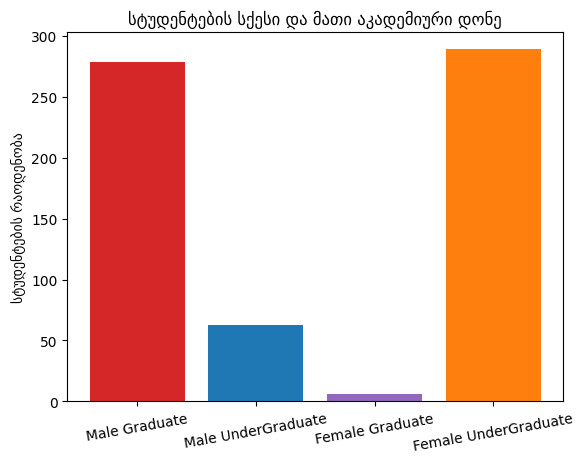

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

male = "Male"
female = "Female"
grad = "Graduate"
undergrad = "Undergraduate"


c.execute("SELECT * FROM your_table_name WHERE Academic_Level = ? AND Gender = ?", (grad,male,))
male_students_grad = c.fetchall()

c.execute("SELECT * FROM your_table_name WHERE Academic_Level = ? AND Gender = ?", (undergrad,male,))
male_students_undergrad = c.fetchall()

c.execute("SELECT * FROM your_table_name WHERE Academic_Level = ? AND Gender = ?", (grad,female,))
female_students_grad = c.fetchall()

c.execute("SELECT * FROM your_table_name WHERE Academic_Level = ? AND Gender = ?", (undergrad,female,))
female_students_undergrad = c.fetchall()


gender = ['Male Graduate', 'Male UnderGraduate', 'Female Graduate', 'Female UnderGraduate']
counts = [len(male_students_grad), len(male_students_undergrad), len(female), len(female_students_undergrad)]
bar_labels = ['red', 'blue', 'purple', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:purple', 'tab:orange']

ax.bar(gender, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('სტუდენტების რაოდენობა')
ax.set_title('სტუდენტების სქესი და მათი აკადემიური დონე')
ax.set_xticks(range(len(gender)))
ax.set_xticklabels(gender, rotation=10)


plt.show()


In [8]:
#კავშირის დასასრული
conn.close()